# Linear regression and 1-dim Principal Component Analysis

## Initial Data

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
np.random.seed(0)
fgs = (10,5)

In [2]:
a, b, s = 1, 0, 100
N_points = 200
X = np.linspace(-100, 100, N_points)
Y = [rd.normal(a*x+b, s) for x in X]

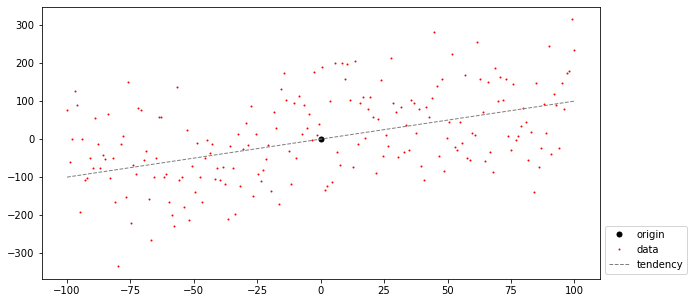

In [3]:
plt.figure(figsize=fgs)
plt.plot(0,0, 'o', c='black', markersize=5, label='origin')
plt.plot(X, Y, 'ro', markersize=1, label='data')
plt.plot(X, [a*x+b for x in X], c='grey', ls='--', linewidth=1, label='tendency')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

## Simple linear regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()

### Linear regression of Y on X

In [5]:
X_fit = np.asarray(X).reshape(N_points,1)
regressor.fit(X_fit, Y)
Y_lin_reg = regressor.predict(X_fit)

In [6]:
print(f'The estimated regression line of Y on X is : y = {round(regressor.coef_[0],4)}*x + {round(regressor.intercept_,4)}')

The estimated regression line of Y on X is : y = 0.9066*x + 7.091


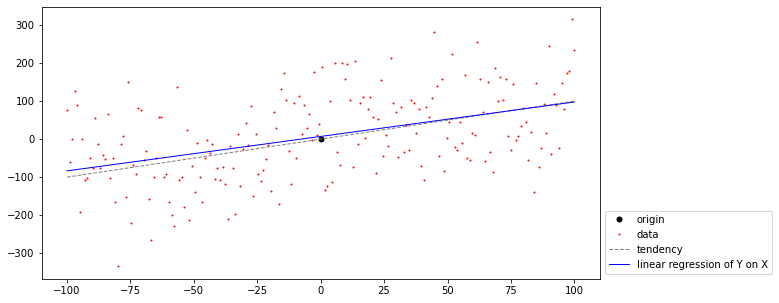

In [7]:
plt.figure(figsize=fgs)
plt.plot(0,0, 'o', c='black', markersize=5, label='origin')
plt.plot(X, Y, 'ro', markersize=1, label='data')
plt.plot(X, [a*x+b for x in X], c='grey', ls='--', linewidth=1, label='tendency')
plt.plot(X, Y_lin_reg, c='b', ls='-', linewidth=1, label='linear regression of Y on X')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

### Linear regression of X on Y

In [8]:
Y_fit = np.asarray(Y).reshape(N_points,1)
regressor.fit(Y_fit, X)
X_lin_reg = regressor.predict(Y_fit)
X_lin_reg_trunc, Y_trunc = zip(*[(x,y) for x,y in zip(X_lin_reg, Y) if -100<=x<=100])

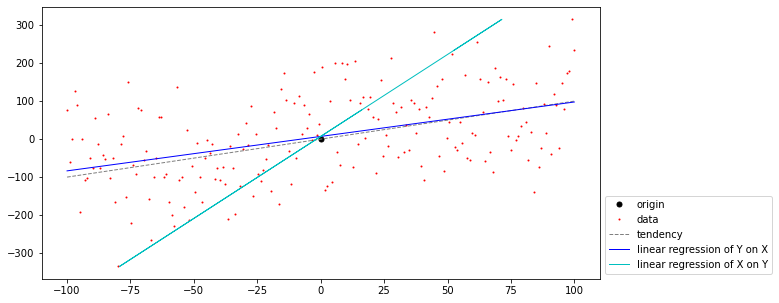

In [9]:
plt.figure(figsize=fgs)
plt.plot(0,0, 'o', c='black', markersize=5, label='origin')
plt.plot(X, Y, 'ro', markersize=1, label='data')
plt.plot(X, [a*x+b for x in X], c='grey', ls='--', linewidth=1, label='tendency')
plt.plot(X, Y_lin_reg, c='b', ls='-', linewidth=1, label='linear regression of Y on X')
plt.plot(X_lin_reg_trunc, Y_trunc, c='c', ls='-', linewidth=1, label='linear regression of X on Y')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

In [10]:
print(f'The estimated regression line of X on Y is : y = {round(1/regressor.coef_[0],4)}*x + {-round(regressor.intercept_/regressor.coef_[0],4)}')

The estimated regression line of X on Y is : y = 4.315*x + 7.091


## 1-Dimensional Principal Component Analysis

In [11]:
from sklearn.decomposition import TruncatedSVD as SVD
svd = SVD(n_components=1, n_iter=100, random_state=0)
X_SVD = np.concatenate([X_fit, np.asarray(Y).reshape(N_points,1)], axis=1)
svd.fit(X_SVD)
V, s = svd.components_[0], svd.singular_values_[0]
a_svd, b_svd = V[1]/V[0], 0 #in PCA we ALWAYS fit with a line through origin (vector space, not affine)
Y_SVD = [a_svd*x for x in X]
print(f'The singular value decomposition returns a singular vector {[round(v,4) for v in V]} with associated singular value {round(s)}')

The singular value decomposition returns a singular vector [-0.2738, -0.9618] with associated singular value 1679.0


In [12]:
print(f'The estimated first component line is : y = {a_svd}*x + 0')

The estimated first component line is : y = 3.5130880898946772*x + 0


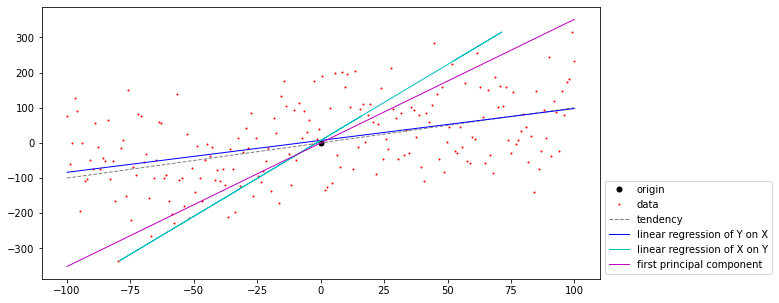

In [13]:
plt.figure(figsize=fgs)
plt.plot(0,0, 'o', c='black', markersize=5, label='origin')
plt.plot(X, Y, 'ro', markersize=1, label='data')
plt.plot(X, [a*x+b for x in X], c='grey', ls='--', linewidth=1, label='tendency')
plt.plot(X, Y_lin_reg, c='b', ls='-', linewidth=1, label='linear regression of Y on X')
plt.plot(X_lin_reg_trunc, Y_trunc, c='c', ls='-', linewidth=1, label='linear regression of X on Y')
plt.plot(X, Y_SVD, c='m', ls='-', linewidth=1, label='first principal component')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

En inversant les axes X et Y on obtient :

In [18]:
tendency = [a*x+b for x in X]
clip_min, clip_max = min(min(Y), min(tendency)), max(max(Y), max(tendency))
Y_lin_reg_trunc, X_trunc_1 = zip(*[(y,x) for y,x in zip(Y_lin_reg, X) if clip_min<=y<=clip_max])
Y_SVD_trunc, X_trunc_2 = zip(*[(y,x) for y,x in zip(Y_SVD, X) if clip_min<=y<=clip_max])

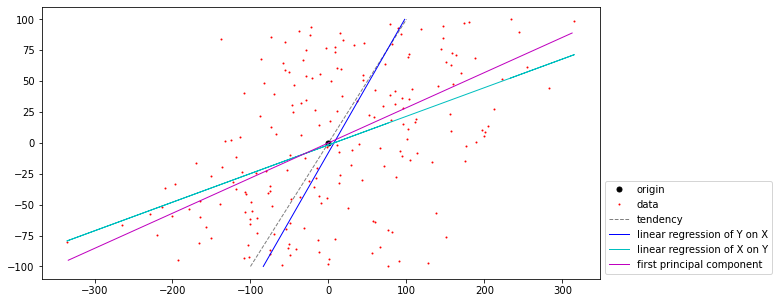

In [19]:
plt.figure(figsize=fgs)
plt.plot(0,0, 'o', c='black', markersize=5, label='origin')
plt.plot(Y, X, 'ro', markersize=1, label='data')
plt.plot(tendency, X, c='grey', ls='--', linewidth=1, label='tendency')
plt.plot(Y_lin_reg_trunc, X_trunc_1, c='b', ls='-', linewidth=1, label='linear regression of Y on X')
plt.plot(Y, X_lin_reg, c='c', ls='-', linewidth=1, label='linear regression of X on Y')
plt.plot(Y_SVD_trunc, X_trunc_2, c='m', ls='-', linewidth=1, label='first principal component')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()